Poisson Distribution

Focuses on the number of discrete event or occurrences over a specified interval or continuum (e.g. time, length, distance, etc..) 

Formal definition: A discrete variable X has a poisson distribution with paramenter $$ \lambda $$ if for k=0,1,2..., the probability mass function of x is given by:

$$ Pr(X - k) = \frac{\lambda^k\epsilon^{-\lambda}}{k!} $$

where:
e is Euler's number (e=2,718)
k! is the factiorial of k


Poisson Distribution has the following characteristics:

1) Discrete outcomes (x=0,1,2,3,...);

2) The number od occurrences can range from zero to infinity (theoretically);

3) It describes the distribution of infrequent (rare) events;

4) Each event is independent of the other events;

5) Describes discrete events over an interval such as a time or distance;

6) The expected number of occurrences E(x) are assumed to be constant throughout the experiment.

Example question:

MacDonald's has a lunch rush from 12:30pm to 1:00pm. From looking at customer sales from previous days, we know that on average 10 customers enter during 12:30pm to 1:00pm. 
<br> 
1) What is the probability that exacly 7 customers enter during lunch
rush?
<br>
2) What is the probability that more than 10 customers arrive?

Let's begin by thinking about how many customers we expect to come into the shop during lunch time. We have that information already. It's 10. This means that the mean is 10, then our expected value E(x) = 10. In the poisson distribution this is λ. So the mean = λ for a Poisson Distribution, it's the expected number of occurrences over the specified interval

So since we now knopw what λ is, we can plug the information into the probability mass function and get an answer, let's use python and see how this works. 

In [5]:
import math
import numpy as np

In [10]:
# Start answering the first question.

##
### This is how to do it manually
##


# set lambda
lamb = 10

# k is the number of occurrences
k=7

# this is the pmf of poisson distribution
prob = (lamb**k)*math.exp(-lamb)/math.factorial(k)

print(f"There's {np.around(100*prob, 2)}% chance that exactly 7 customers show up at the lunch time!")


There's 9.01% chance that exactly 7 customers show up at the lunch time!


In [11]:
from scipy.stats import poisson

In [15]:
##
### Doing it automatically with stats
## 

mu = 10 # this is the mean, same as lambda
mean,var = poisson.stats(mu) # getting mean and variance

# calculate the PMF at specific points, such as odds of exactly 7 customers
odd_seven = poisson.pmf(7, mu)

print(f'Chance of 7 customers is {np.around(100*odd_seven,2)}')
print(f'The mean is {mean}')

Chance of 7 customers is 9.01
The mean is 10.0


What if we want to see the entire distribution? We'll need this information to answer the second question.

In [17]:
# let's get the pmf and plot it

# let's say we want the PMF all the way to 30 customers
k = np.arange(30)

# avg of 10 customers for the time interval
lamb = 10

# the PMF we'll use to plot
pmf_pois = poisson.pmf(k, lamb)

<BarContainer object of 30 artists>

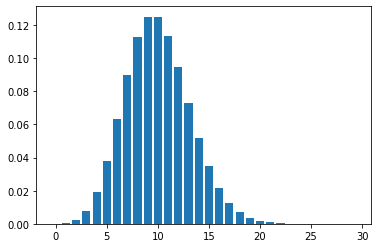

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.bar(k, pmf_pois)

What is the probability that more than 10 customers arrive?
We need to sum up all the values of every bar past 10.
This can be done by using a Cumilative Distribution Function (CDF). This describes the probability that a random variable x with a given probability distribution (such as the poisson in this current case) will be found to have a value less than or equal to x.
<br>
What this means is if we use the CDF to calculate the probability of 10 or less customers showing up we can take that probability and subtract it from the total probability space, which is just 1.

In [23]:
# scipy has a built in CDF we can use

k,mu = 10,10
prob_10 = poisson.cdf(k,mu)
print(f'The prob of <=10 customers is {np.around(100*prob_10,2)}%')

The prob of <=10 customers is 58.3%


In [25]:
# Now that we have the prob of 10 or less customers
# we can answer the next question

prob_more_10 = 1-prob_10
print(f'Probability of >10 customers is {np.around(100*prob_more_10,2)}%')

Probability of >10 customers is 41.7%
